First few rows of the data:
   Flight ID    Airline  Flight_Distance Origin_Airport Destination_Airport  \
0  7319483.0  Airline D            475.0      Airport 3           Airport 2   
1  4791965.0  Airline E            538.0      Airport 5           Airport 4   
2  2991718.0  Airline C            565.0      Airport 1           Airport 2   
3  4220106.0  Airline E            658.0      Airport 5           Airport 3   
4  2263008.0  Airline E            566.0      Airport 2           Airport 2   

   Scheduled_Departure_Time  Day_of_Week  Month Airplane_Type  Weather_Score  \
0                       4.0          6.0    1.0        Type C       0.225122   
1                      12.0          1.0    6.0        Type B       0.060346   
2                      17.0          3.0    9.0        Type C       0.093920   
3                       1.0          1.0    8.0        Type B       0.656750   
4                      19.0          7.0   12.0        Type E       0.505211   

   Previous_Flig

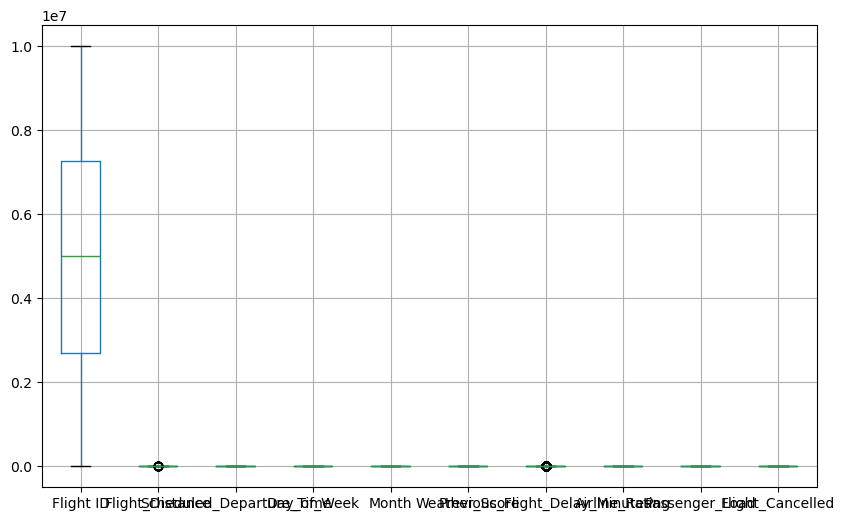


Data types of each column:
Flight ID                         float64
Airline                          category
Flight_Distance                   float64
Origin_Airport                   category
Destination_Airport              category
Scheduled_Departure_Time          float64
Day_of_Week                       float64
Month                             float64
Airplane_Type                    category
Weather_Score                     float64
Previous_Flight_Delay_Minutes     float64
Airline_Rating                    float64
Passenger_Load                    float64
Flight_Cancelled                  float64
dtype: object

Cleaned Data:
   Flight ID    Airline  Flight_Distance Origin_Airport Destination_Airport  \
0  7319483.0  Airline D            475.0      Airport 3           Airport 2   
1  4791965.0  Airline E            538.0      Airport 5           Airport 4   
2  2991718.0  Airline C            565.0      Airport 1           Airport 2   
3  4220106.0  Airline E            658.

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:/Users/jasmi/Downloads/Flyzy Flight Cancellation.csv")
categorical_cols = ['Airline', 'Origin_Airport', 'Destination_Airport', 'Airplane_Type']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# 1. Initial inspection of data
print("First few rows of the data:")
print(df.head())

# 2. Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Handling missing values
# For numeric columns: Filling missing values with the column mean
# Fill missing values in numeric columns with the column mean
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values in categorical columns with the mode
categorical_cols = ['Airline', 'Origin_Airport', 'Destination_Airport', 'Airplane_Type']
for col in categorical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)


# 3. Remove outliers (using Z-score for numeric columns)
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).all(axis=1)
df = df[~outliers]  # Removing rows with outliers

# 4. Visualize outliers using boxplot (optional, but useful for checking)
df.select_dtypes(include=[np.number]).boxplot(figsize=(10, 6))
plt.show()

# 5. Check data types of each column
print("\nData types of each column:")
print(df.dtypes)

# 6. Final check of the cleaned data
print("\nCleaned Data:")
print(df.head())

# 7. Save the cleaned dataset as a new CSV file
df.to_csv("C:/Users/jasmi/Downloads/Flyzy_Flight_Cancellation_Cleaned.csv", index=False)
